### Könyvtárak importálása

In [1]:
import pandas as pd
import numpy as np
import researchpy as rp
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

### X-ek és hozzájuk tartozó négyzetes y-ok generálása

In [49]:
X = np.linspace(start=0, stop=100, num=100)
y = []
for i in range(100):
    rnd = np.random.randint(0, 2)
    if(rnd == 0):
        y.append(X[i]**2 + i**(1.3))
    else:
        y.append(X[i]**2 - i**(1.3))

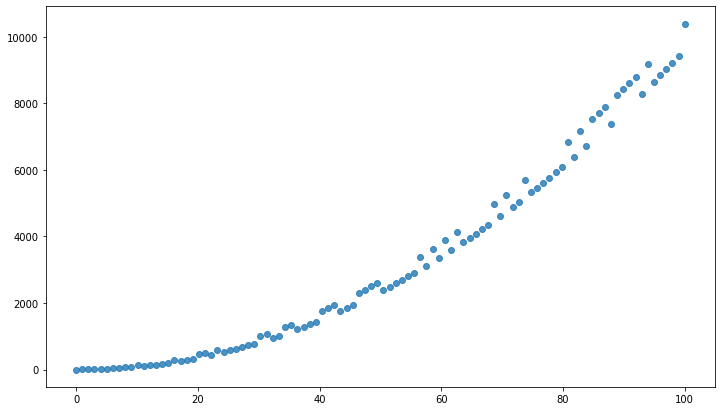

In [50]:
plt.figure(figsize=(12, 7))
plt.scatter(X, y, alpha=0.8)

### X-ekből X^2-ek készítése - power_X

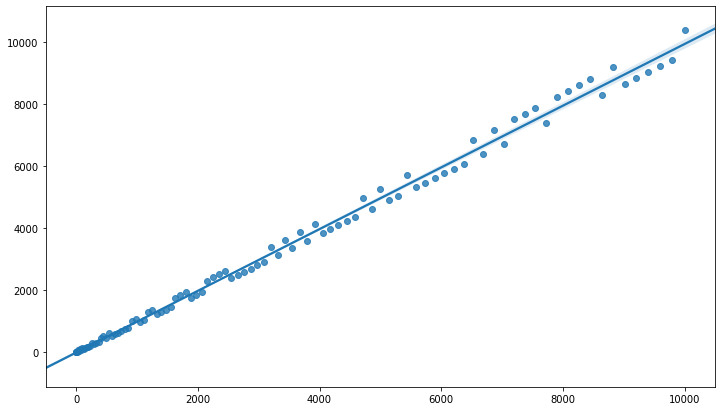

In [51]:
power_X = X**2

plt.figure(figsize=(12, 7))
sns.regplot(x=power_X, y=y) #exp(X), y

In [59]:
B1, B0, rval, pval, stderr = stats.linregress(X**2, y)
stats.linregress(X**2, y)

LinregressResult(slope=0.996200766753421, intercept=-21.231720303918337, rvalue=0.9976802729372308, pvalue=3.454523755787312e-116, stderr=0.006866317538460474)

### X^2, y-hoz tartozó egyenes együtthatói

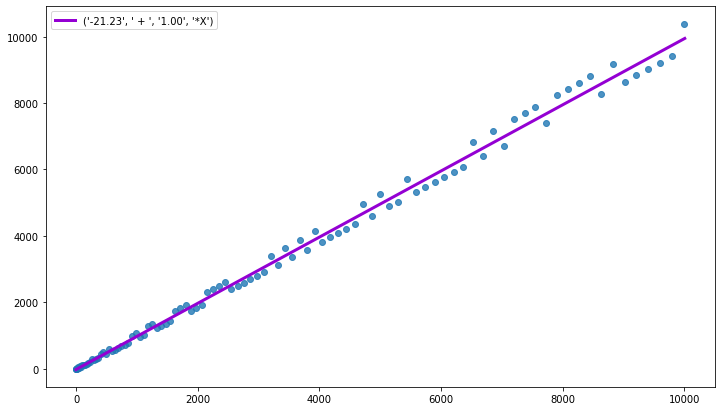

In [60]:
plt.figure(figsize=(12, 7))
plt.scatter(X**2, y, alpha=0.8)

vonal_x = np.linspace(np.min(X**2)-1, np.max(X**2)+5, 2)
vonal_y = (B0 + B1*vonal_x)

plt.plot(vonal_x, vonal_y, c='darkviolet', linewidth=3, label=('{0:.2f}'.format(B0),' + ','{0:.2f}'.format(B1), '*X'))
plt.legend()
plt.show()

### Négyzetes görbe ábrázolása Y = B0 + (B1*X^2)

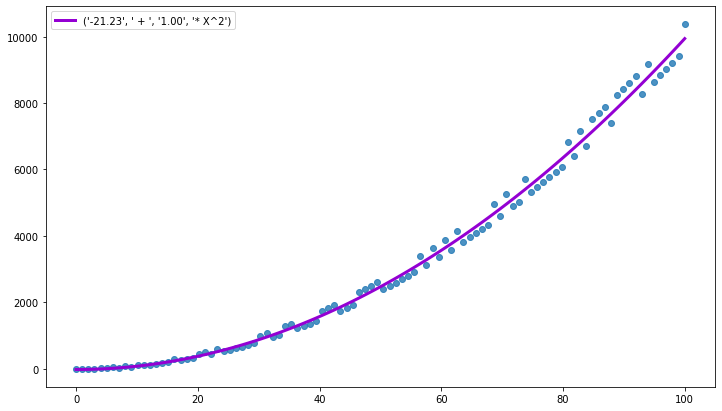

In [63]:
plt.figure(figsize=(12, 7))
plt.scatter(X, y, alpha=0.8)

plt.plot(X, B0 + B1*(X**2), c='darkviolet', linewidth=3, label=('{0:.2f}'.format(B0),' + ','{0:.2f}'.format(B1), '* X^2')) #Y = B0 + log(B1*X)
plt.legend()

plt.show()

### Prediction

In [70]:
def power_predict(x):
    return B0 + B1*(x**2)

power_predict(45)

1996.0748323717592

### R^2

In [71]:
from sklearn.metrics import r2_score

ypower_predicted = list(map(power_predict, X))
print('R^2: ', r2_score(y, ypower_predicted)) #(tényleges, predicted)

R^2:  0.9953659270081073
